# LVDT Position Simulation Plots
### Analyse the position measurement of a normal LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [1]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil,
[2] = lower outer coil, 
[3] = inner coil
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [2]:
files = ['LVDT_Position_ETpf_LIP_10kHz_20mA_32AWG_20mm.out',
         'LVDT_Position_ETpf_LIP_10kHz_20mA_32AWG.out']

legends = ['pyFEMM 20mm',
           'pyFEMM']

inputdata = []
NSteps = []
StepSize = []
InnCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i], dtype=complex)
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[4][0].real))
    StepSize.append(inputarray[4][1].real)
    InnCoil_Current.append(inputarray[4][2].real) 

print(inputdata)
print(NSteps)
print(StepSize)
print(InnCoil_Current)

[array([[-1.00000000e+01+0.j        , -9.00000000e+00+0.j        ,
        -8.00000000e+00+0.j        , -7.00000000e+00+0.j        ,
        -6.00000000e+00+0.j        , -5.00000000e+00+0.j        ,
        -4.00000000e+00+0.j        , -3.00000000e+00+0.j        ,
        -2.00000000e+00+0.j        , -1.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
         2.00000000e+00+0.j        ,  3.00000000e+00+0.j        ,
         4.00000000e+00+0.j        ,  5.00000000e+00+0.j        ,
         6.00000000e+00+0.j        ,  7.00000000e+00+0.j        ,
         8.00000000e+00+0.j        ,  9.00000000e+00+0.j        ,
         1.00000000e+01+0.j        ],
       [ 1.79963817e-02+0.62954087j,  1.87370290e-02+0.65660725j,
         1.95035737e-02+0.6847963j ,  2.02934701e-02+0.71414142j,
         2.11098141e-02+0.7446124j ,  2.19490177e-02+0.77625488j,
         2.28132478e-02+0.80902737j,  2.36983102e-02+0.84295356j,
         2.46028497e-02+0.87801607j, 

#### Analyse and plot output data
Basic plots:

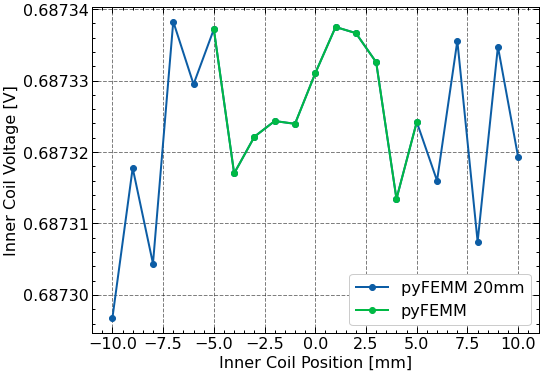

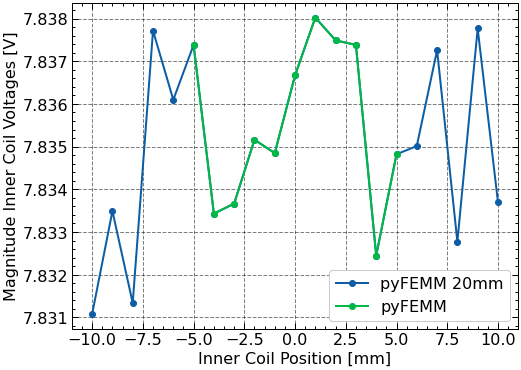

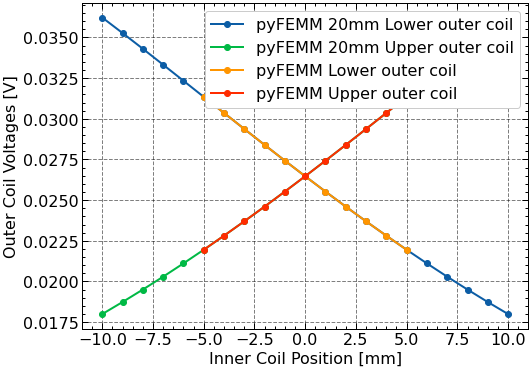

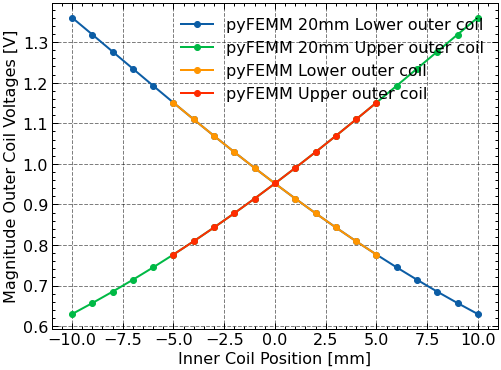

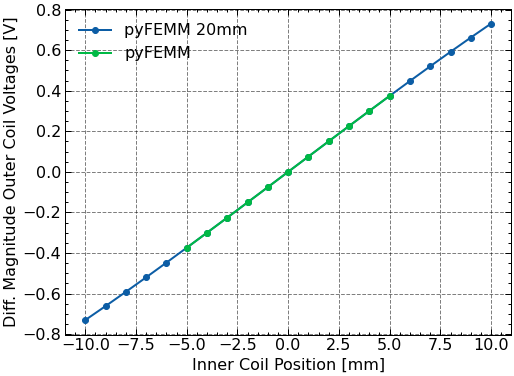

Phase offset: -0.06125284312332657 -0.06122627795804414
Phase offset: -0.060569670103027606 -0.060595414175263596


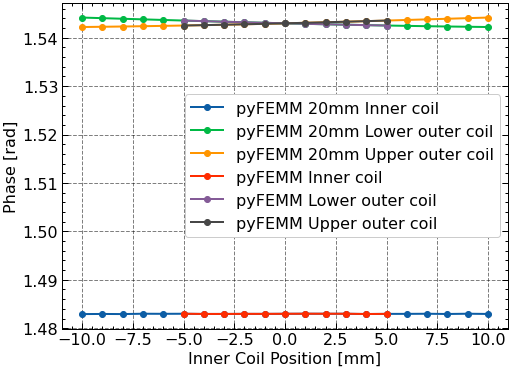

In [3]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3].real, 'o-', label=legends[i])
plt.ylabel('Inner Coil Voltage [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][3]), 'o-', label=legends[i])
plt.ylabel('Magnitude Inner Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2].real, 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], inputdata[i][1].real, 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][2]), 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], abs(inputdata[i][1]), 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Magnitude Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(frameon=False)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][1]) - abs(inputdata[i][2]), 'o-', label=legends[i])
plt.ylabel('Diff. Magnitude Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(frameon=False)
plt.show()

InnCoil_Phases = []
LowOutCoil_Phases = []
UppOutCoil_Phases = []
for i in range(0,len(files)):
    InnCoil_Phases.append(np.angle(inputdata[i][3]))
    LowOutCoil_Phases.append(np.angle(inputdata[i][2]))
    UppOutCoil_Phases.append(np.angle(inputdata[i][1]))
    
for i in range(0,len(files)):    
    print("Phase offset:", InnCoil_Phases[i][0] - LowOutCoil_Phases[i][0], InnCoil_Phases[i][NSteps[i]] - UppOutCoil_Phases[i][NSteps[i]])
    plt.plot(inputdata[i][0], InnCoil_Phases[i], 'o-', label=legends[i] + " Inner coil")
    plt.plot(inputdata[i][0], LowOutCoil_Phases[i], 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], UppOutCoil_Phases[i], 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Phase [rad]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

Create normalised response of the difference in the outer coils in V/mmA with magnitude of complex numbers and fit to check linearity and get sensitivity.

Fitted slope of the function: 3.7503601127786026
Fitted slope of the function: 3.7503601127786026


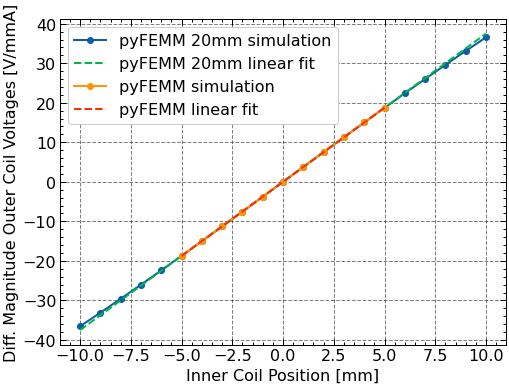

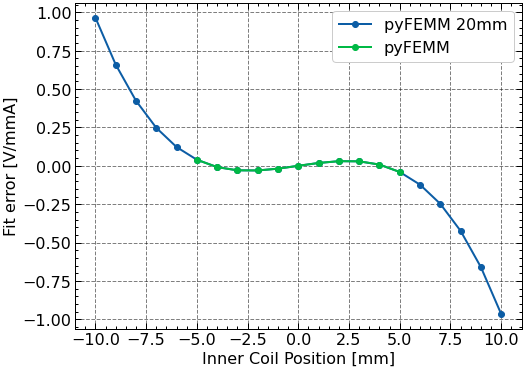

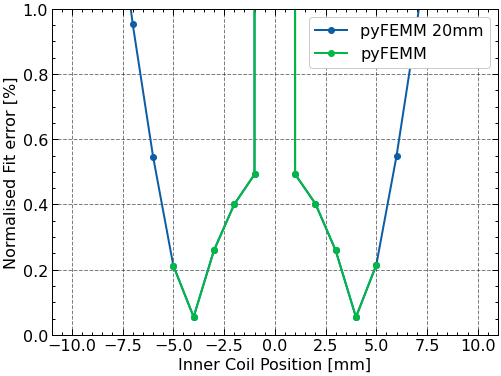

In [4]:
def linfunc(x, a, b):
     return a*x + b

Norm_OutCoil_Signals = []
fitted_Norm_OutCoil_Signals = []

for i in range(0,len(files)):
    Norm_OutCoil_Signals.append((abs(inputdata[i][1]) - abs(inputdata[i][2]))/StepSize[i]/InnCoil_Current[i])
    # fit range
    xrange = inputdata[i][0]
    fitx1 = -5.0
    fitx2 = 5.0
    x2 = xrange[(xrange >= fitx1) & (xrange <= fitx2)]
    y2 = Norm_OutCoil_Signals[i][(xrange >= fitx1) & (xrange <= fitx2)]
    optimizedParameters, pcov = opt.curve_fit(linfunc, x2, y2)
    print("Fitted slope of the function:",optimizedParameters[0])
    fitted_Norm_OutCoil_Signals.append(linfunc(inputdata[i][0], *optimizedParameters))
    plt.plot(inputdata[i][0], Norm_OutCoil_Signals[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_OutCoil_Signals[i], '--', label=legends[i] + " linear fit")

plt.ylabel('Diff. Magnitude Outer Coil Voltages [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_OutCoil_Signals[i] - fitted_Norm_OutCoil_Signals[i], 'o-', label=legends[i])
plt.ylabel('Fit error [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], 100*abs(Norm_OutCoil_Signals[i] - fitted_Norm_OutCoil_Signals[i])/abs(Norm_OutCoil_Signals[i]), 'o-', label=legends[i])
plt.ylabel('Normalised Fit error [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,1.0)
plt.legend()
plt.show()